## Evolution strategy for optimizing functions

The canonical Evolution strategy is represented by the following algorithm:

1. **Initialization (t=0)**:
   - Set $ t = 0 $.

2. **Initialize Population**:
   - Initialize the population $ P_t $ with $ \mu $ random individuals from $ \mathbb{R}^n $.

3. **Iterative Evolution**:
   - While the stopping condition is not met, do:
     1. **Offspring Generation**:
        - Determine individuals from $ P_t $ with equal probability to obtain $ \lambda $ offspring.
     2. **Mutation**:
        - Perform mutations on offspring.
     3. **Fitness Evaluation**:
        - Calculate the fitness-function of the offspring.
     4. **Selection**:
        - Select the best individuals and descendants based on the fitness-function values, and create $ P_{t+1} $.
     5. **Update Generation Count**:
        - $ t = t + 1 $.

While genetic algorithms model evolution at the level of genomes, Evolution Strategy focuses on the evolution of phenotypes. The phenotypes in Evolution Strategy are represented by real-valued vectors. Originally, Evolution Strategy comprised a parent and an offspring. In the basic algorithm, the parent mutates to create an offspring, and one of these two individuals with the best fitness-function value progresses to the population of the next generation.

Comparing Evolution Strategy and genetic algorithms, their main difference lies in the selection process: 
- Genetic algorithms select individuals for recombination proportional to their fitness-function and replace individuals from the previous population.
- Evolution Strategy selects individuals for reproduction with equal probabilities, and the formation of the next population is based on fitness-function values.

In essence, both Evolution Strategy and genetic algorithms represent two sides of the same coin, with equivalent results according to experiments.

**Parameters:**
- Adaptability function: $ f(x) = F(x,y) $, where $ x $ and $ y $ are values characterizing an individual in the population.
- Population size: $ N = 20 $.
- Generation of offspring: Proportionality.
- Method of selection of the next population: $ N $ best.
- Mutation probability: $ 0.0 $.
- Value of mutation: $ 3 $.
- Sigma: $ 2 $.

In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import colorama
from colorama import Fore, Style
from math import floor
import math

mpl.rcParams['legend.fontsize'] = 10
colorama.init()

def functionSphere(x, y):
    return x**2 + y**2

def functionMatias(x, y):
    return 0.26 * (x**2 + y**2) - 0.48 * x * y

def functionMackormic(x, y):
    return np.sin(x + y) + (x - y)**2 - 1.5 * x + 2.5 * y + 1

def method(function, graph, total_iter, n, ls, rs, pm, mv, sigma, phenotype):
    number_of_population = 0
    previous_avg = 0
    previous_max = 0
    current_avg = 0
    current_max = 0
    begin_avg = 0
    begin_max = 0
    for i in range(total_iter):
        number_of_population += 1
        print("\nPopulation {0}".format(number_of_population))
        [fitness, current_avg, current_max] = current_population(function, n, phenotype)
        if i != 0:
            print("\nDifference in population fitness: {0}".format(current_avg - previous_avg))
            print("Difference in max fitness: {0}".format(current_max - previous_max))
            if current_avg - previous_avg == 0 and current_max - previous_max == 0:
                print("\nOptimum for this experiment has been found")
                break
            previous_avg = current_avg
            previous_max = current_max
        else:
            previous_avg = current_avg
            previous_max = current_max
            begin_avg = current_avg
            begin_max = current_max
        graph(number_of_population, phenotype, fitness)
        if i < total_iter:
            phenotype = future_population(function, n, ls, rs, pm, mv, sigma, phenotype, fitness)
    print("\nDifference in population fitness between first and final population: {0}".format(round(current_avg-begin_avg, 2)))
    print("Difference in max fitness between first and final population: {0}".format(current_max-begin_max))

def current_population(function, n, phenotype):
    fitness = []
    for i in phenotype:
        fitness.append(round(function(i[0], i[1]), 2))
    print("| {0:^2} | {1:^18} | {2:^18} | {3:^16} |".format("№", "Phenotype(x)", "Phenotype(y)", "Fitness function"))
    for i in range(n):
        print("| {0:^2} | {1:^18} | {2:^18} | {3:^16} |".format(i+1, phenotype[i][0], phenotype[i][1], fitness[i]))
    print("\nPopulation fitness:")
    print(sum(fitness)/n)
    print("\nMax fitness:")
    print(max(fitness))
    return [fitness, sum(fitness)/n, max(fitness)]

def future_population(function, n, ls, rs, pm, mv, sigma, phenotype, fitness):
    sum_fit = sum(fitness)
    propability = []
    numb_of_children = []
    for i in range(n):
        propability.append(round(fitness[i]/sum_fit*n, 2))
        numb_of_children.append(round(fitness[i]/sum_fit*n))
    max_add_propability = propability[0]
    coef_add_child = 0
    while sum(numb_of_children) < n:
        for i in range(1,n):
            if propability[i] % 1 < 0.5 and propability[i] % 1 > max_add_propability:
                coef_add_child = i
        numb_of_children[coef_add_child] += 1
        propability[coef_add_child] = 0        
    new_phen = []
    for i in range(n):
        children = generate(phenotype[i], ls, rs, pm, mv, sigma, numb_of_children[i])
        for j in children:
            new_phen.append(j)
    phenotype += new_phen
    for i in new_phen:
        fitness.append(function(i[0], i[1]))
    elem_dict = {fitness[i]:phenotype[i] for i in range(n*2)}
    fitness.sort()
    fitness = fitness[n:n*2]
    new_phen = []
    for i in fitness:
        new_phen.append(elem_dict[i])
    phenotype = new_phen
    return new_phen 

def generate(parent, ls, rs, pm, mv, sigma, children_numb):
    children = []
    for i in range(children_numb):
        for_x = np.random.randint(0, 2)
        for_y = np.random.randint(0, 2)
        child = [parent[0], parent[1]]
        if for_y == 0 and for_x == 0:
            child[0] = parent[0] - sigma**2
            child[1] = parent[1] - sigma**2
            if child[0] < ls:
                child[0] = ls
            if child[1] < ls:
                child[1] = ls
            children.append(child)
        elif for_y == 1 and for_x == 0:
            child[0] = parent[0] - sigma**2
            child[1] = parent[1] + sigma**2
            if child[0] < ls:
                child[0] = ls
            if child[1] > rs:
                child[1] = rs
            children.append(child)
        elif for_y == 0 and for_x == 1:
            child[0] = parent[0] + sigma**2
            child[1] = parent[1] - sigma**2
            if child[0] > rs:
                child[0] = rs
            if child[1] < ls:
                child[1] = ls
            children.append(child)
        elif for_y == 1 and for_x == 1:
            child[0] = parent[0] + sigma**2
            child[1] = parent[1] + sigma**2
            if child[0] > rs:
                child[0] = rs
            if child[1] > rs:
                child[1] = rs
            children.append(child)
    children = mutation(children, pm, mv)    
    return children

def mutation(children, pm, mutation_value):
    for i in range(len(children)):
        for j in range(len(children[i])):
            if np.random.randint(0, 100) < int(pm*100) and np.random.randint(0, 1) == 0:
                children[i][j] -= mutation_value
            elif np.random.randint(0, 100) < int(pm*100) and np.random.randint(0, 1) == 1:
                children[i][j] += mutation_value
    return children

def graficSphere(number_of_population, phenotype, fitness):
    x, y = np.mgrid[-63:63:1, -63:63:1]
    z = functionSphere(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.set_title("Population {0}".format(number_of_population))
    ax.plot_wireframe(x, y, z, label="Sphere function")
    for i in range(len(phenotype)):
        ax.plot(phenotype[i][0], phenotype[i][1], fitness[i], "ro")
    ax.legend()
    plt.show()

def graficMatias(number_of_population, phenotype, fitness):
    x, y = np.mgrid[-63:63:1, -63:63:1]
    z = functionMatias(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.set_title("Population {0}".format(number_of_population))
    ax.plot_wireframe(x, y, z, color="green", label="Matias function")
    for i in range(len(phenotype)):
        ax.plot(phenotype[i][0], phenotype[i][1], fitness[i], "ro")
    ax.legend()
    plt.show()

def graficMackormic(number_of_population, phenotype, fitness):
    x, y = np.mgrid[-63:63:1, -63:63:1]
    z = functionMackormic(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.set_title("Population {0}".format(number_of_population))
    ax.plot_wireframe(x, y, z, color="yellow", label="Mackormic function")
    for i in range(len(phenotype)):
        ax.plot(phenotype[i][0], phenotype[i][1], fitness[i], "ro")
    ax.legend()
    plt.show()

total_iter = 10
N = 20
left_side = -63
right_side = 63
Pm = 0.0
Mv = 3
Sigma = 2
in_phenotype = []
for i in range(N):
    in_phenotype.append([np.random.randint(left_side, right_side+1), np.random.randint(left_side, right_side+1)])

### Optimize Sphere Function


Population 1
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |         29         |        -51         |       3442       |
| 2  |        -52         |         42         |       4468       |
| 3  |         16         |         10         |       356        |
| 4  |         12         |         48         |       2448       |
| 5  |         43         |         63         |       5818       |
| 6  |         8          |         -5         |        89        |
| 7  |        -45         |         58         |       5389       |
| 8  |         30         |        -61         |       4621       |
| 9  |         62         |        -33         |       4933       |
| 10 |        -46         |        -58         |       5480       |
| 11 |        -58         |        -48         |       5668       |
| 12 |        -28         |         1          |       785        |
| 13 |         28         |         9          |       865        |
| 14 |         21         |       

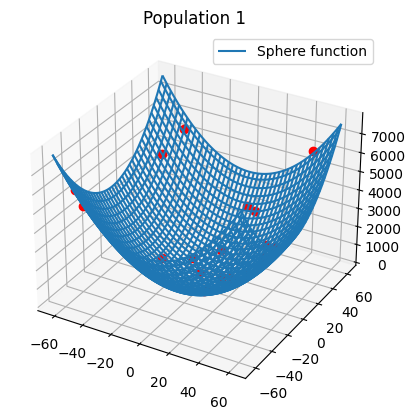


Population 2
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |         61         |        -21         |       4162       |
| 2  |        -52         |         42         |       4468       |
| 3  |        -41         |         54         |       4597       |
| 4  |         30         |        -61         |       4621       |
| 5  |        -42         |        -54         |       4680       |
| 6  |         63         |        -29         |       4810       |
| 7  |         62         |        -33         |       4933       |
| 8  |         39         |         59         |       5002       |
| 9  |         34         |        -63         |       5125       |
| 10 |        -56         |         46         |       5252       |
| 11 |        -49         |         54         |       5317       |
| 12 |         63         |        -37         |       5338       |
| 13 |        -45         |         58         |       5389       |
| 14 |        -50         |       

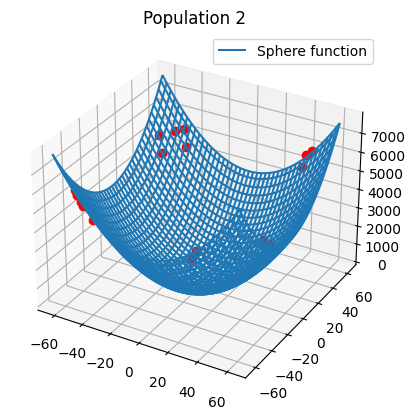


Population 3
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |         34         |        -63         |       5125       |
| 2  |         35         |         63         |       5194       |
| 3  |        -56         |         46         |       5252       |
| 4  |        -53         |         50         |       5309       |
| 5  |        -49         |         54         |       5317       |
| 6  |         63         |        -37         |       5338       |
| 7  |        -45         |         58         |       5389       |
| 8  |         38         |        -63         |       5413       |
| 9  |        -50         |        -54         |       5416       |
| 10 |        -46         |        -58         |       5480       |
| 11 |         39         |         63         |       5490       |
| 12 |         39         |         63         |       5490       |
| 13 |        -54         |        -52         |       5620       |
| 14 |        -54         |       

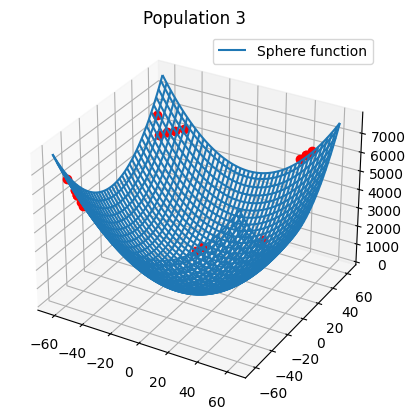


Population 4
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |        -54         |        -50         |       5416       |
| 2  |        -54         |        -50         |       5416       |
| 3  |        -46         |        -58         |       5480       |
| 4  |         39         |         63         |       5490       |
| 5  |         39         |         63         |       5490       |
| 6  |         39         |         63         |       5490       |
| 7  |        -54         |        -52         |       5620       |
| 8  |        -54         |        -52         |       5620       |
| 9  |        -54         |        -52         |       5620       |
| 10 |        -54         |        -52         |       5620       |
| 11 |        -50         |        -56         |       5636       |
| 12 |        -50         |        -56         |       5636       |
| 13 |        -50         |        -56         |       5636       |
| 14 |        -58         |       

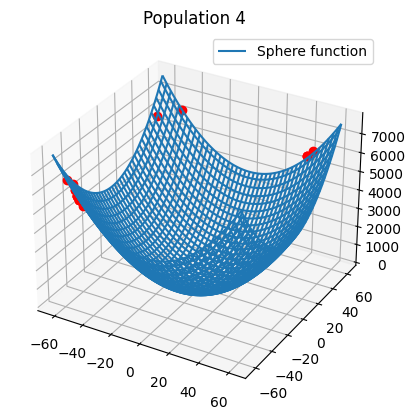


Population 5
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |        -50         |        -56         |       5636       |
| 2  |        -58         |        -48         |       5668       |
| 3  |        -58         |        -48         |       5668       |
| 4  |        -58         |        -48         |       5668       |
| 5  |        -46         |        -60         |       5716       |
| 6  |        -46         |        -60         |       5716       |
| 7  |        -62         |        -44         |       5780       |
| 8  |         43         |         63         |       5818       |
| 9  |         43         |         63         |       5818       |
| 10 |         43         |         63         |       5818       |
| 11 |        -56         |         54         |       6052       |
| 12 |        -60         |         50         |       6100       |
| 13 |        -49         |         62         |       6245       |
| 14 |        -58         |       

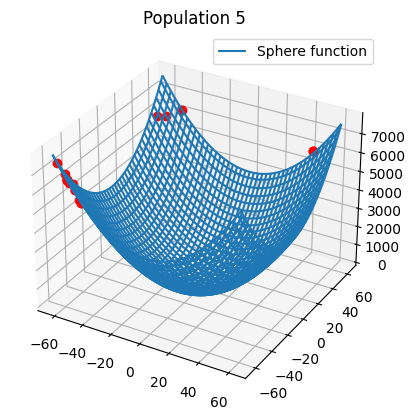


Population 6
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |         43         |         63         |       5818       |
| 2  |         43         |         63         |       5818       |
| 3  |         43         |         63         |       5818       |
| 4  |        -45         |         63         |       5994       |
| 5  |        -56         |         54         |       6052       |
| 6  |        -63         |         46         |       6085       |
| 7  |        -60         |         50         |       6100       |
| 8  |        -60         |         50         |       6100       |
| 9  |        -49         |         62         |       6245       |
| 10 |        -58         |        -54         |       6280       |
| 11 |        -58         |        -56         |       6500       |
| 12 |        -58         |        -56         |       6500       |
| 13 |        -58         |        -56         |       6500       |
| 14 |        -58         |       

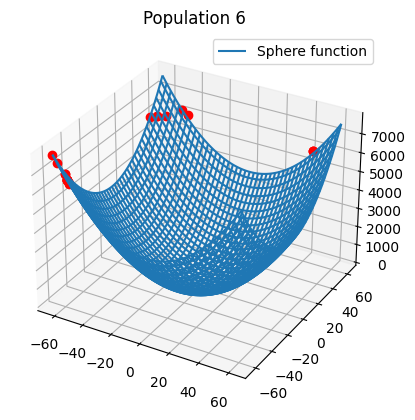


Population 7
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |        -58         |        -54         |       6280       |
| 2  |        -50         |        -63         |       6469       |
| 3  |        -58         |        -56         |       6500       |
| 4  |        -58         |        -56         |       6500       |
| 5  |        -58         |        -56         |       6500       |
| 6  |        -58         |        -56         |       6500       |
| 7  |        -58         |        -56         |       6500       |
| 8  |        -54         |        -60         |       6516       |
| 9  |        -54         |        -60         |       6516       |
| 10 |        -62         |        -52         |       6548       |
| 11 |        -62         |        -52         |       6548       |
| 12 |        -62         |        -52         |       6548       |
| 13 |        -60         |         58         |       6964       |
| 14 |        -63         |       

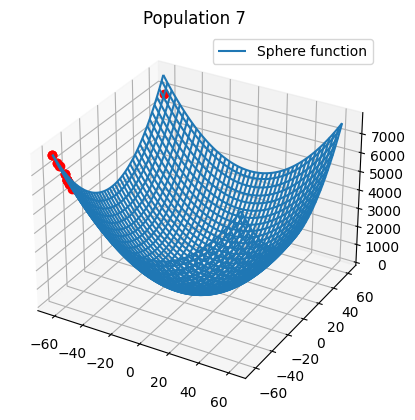


Population 8
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |        -62         |        -52         |       6548       |
| 2  |        -62         |        -52         |       6548       |
| 3  |        -62         |        -52         |       6548       |
| 4  |        -63         |        -54         |       6885       |
| 5  |        -60         |         58         |       6964       |
| 6  |        -63         |        -56         |       7105       |
| 7  |        -63         |        -56         |       7105       |
| 8  |        -62         |        -58         |       7208       |
| 9  |        -58         |        -63         |       7333       |
| 10 |        -62         |        -60         |       7444       |
| 11 |        -62         |        -60         |       7444       |
| 12 |        -62         |        -60         |       7444       |
| 13 |        -62         |        -60         |       7444       |
| 14 |        -59         |       

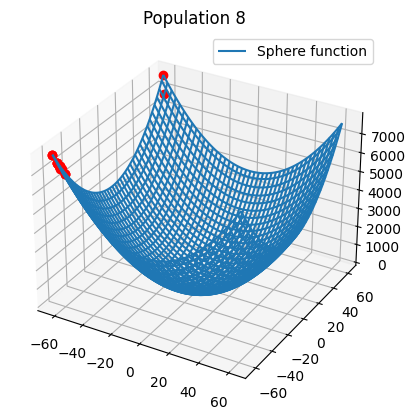


Population 9
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |        -58         |        -62         |       7208       |
| 2  |        -58         |        -63         |       7333       |
| 3  |        -62         |        -60         |       7444       |
| 4  |        -62         |        -60         |       7444       |
| 5  |        -62         |        -60         |       7444       |
| 6  |        -62         |        -60         |       7444       |
| 7  |        -63         |        -59         |       7450       |
| 8  |        -63         |        -59         |       7450       |
| 9  |        -63         |        -59         |       7450       |
| 10 |        -63         |        -59         |       7450       |
| 11 |        -63         |        -59         |       7450       |
| 12 |        -63         |        -59         |       7450       |
| 13 |        -63         |         62         |       7813       |
| 14 |        -63         |       

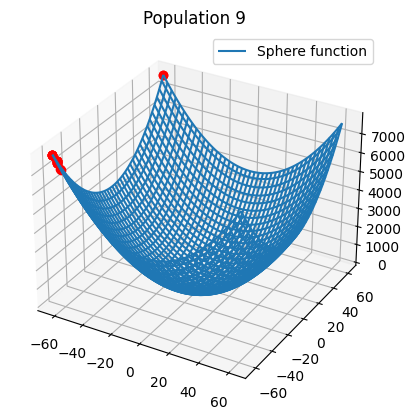


Population 10
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |        -59         |        -63         |       7450       |
| 2  |        -59         |        -63         |       7450       |
| 3  |        -59         |        -63         |       7450       |
| 4  |        -59         |        -63         |       7450       |
| 5  |        -59         |        -63         |       7450       |
| 6  |        -59         |        -63         |       7450       |
| 7  |        -59         |        -63         |       7450       |
| 8  |        -59         |        -63         |       7450       |
| 9  |        -63         |         62         |       7813       |
| 10 |        -63         |         62         |       7813       |
| 11 |        -63         |         63         |       7938       |
| 12 |        -63         |         63         |       7938       |
| 13 |        -63         |         63         |       7938       |
| 14 |        -63         |      

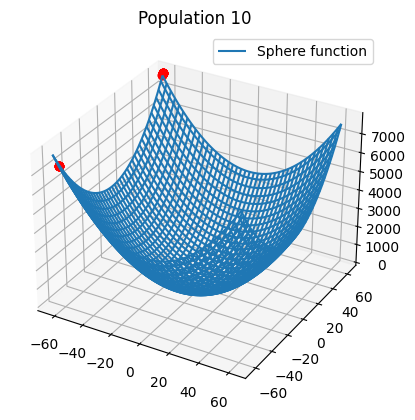


Difference in population fitness between first and final population: 4946.55
Difference in max fitness between first and final population: 2120


In [21]:
method(functionSphere, graficSphere, total_iter, N, left_side, right_side, Pm, Mv, Sigma, in_phenotype)

### Optimize Matias Function


Population 1
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |         -6         |        -34         |      212.0       |
| 2  |         63         |        -26         |     1993.94      |
| 3  |        -15         |         43         |      848.84      |
| 4  |         36         |         44         |       80.0       |
| 5  |         2          |         3          |       0.5        |
| 6  |         56         |         58         |      130.96      |
| 7  |         15         |        -52         |     1135.94      |
| 8  |         29         |        -24         |      702.5       |
| 9  |         44         |        -11         |      767.14      |
| 10 |        -48         |        -18         |      268.56      |
| 11 |        -40         |        -42         |      68.24       |
| 12 |         30         |        -36         |     1089.36      |
| 13 |         8          |         63         |      806.66      |
| 14 |         0          |       

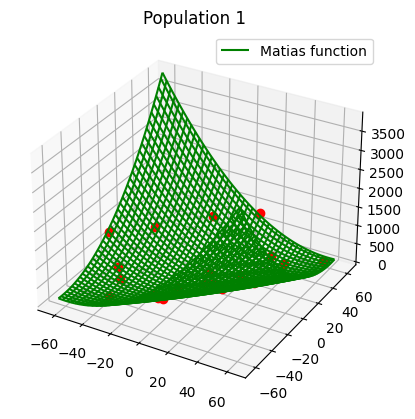


Population 2
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |        -62         |         -6         |      830.24      |
| 2  |        -15         |         43         |      848.84      |
| 3  |        -11         |         47         |      853.96      |
| 4  |         4          |        -54         |      866.0       |
| 5  |         33         |        -28         |      930.5       |
| 6  |        -63         |         -2         |      972.5       |
| 7  |         34         |        -32         |     1089.04      |
| 8  |         30         |        -36         |     1089.36      |
| 9  |         19         |        -48         |     1130.66      |
| 10 |         15         |        -52         |     1135.94      |
| 11 |         11         |        -56         |      1142.5      |
| 12 |         30         |        -43         |     1333.94      |
| 13 |         34         |        -40         |     1369.36      |
| 14 |         38         |       

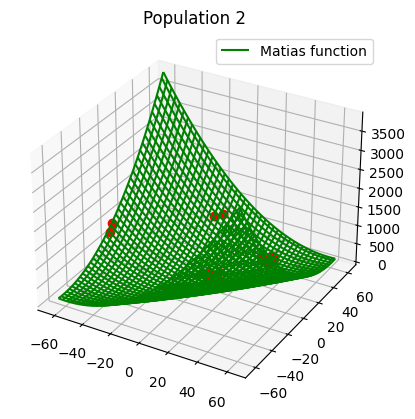


Population 3
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |         34         |        -39         |      1332.5      |
| 2  |         30         |        -43         |     1333.94      |
| 3  |         30         |        -43         |     1333.94      |
| 4  |         26         |        -47         |     1336.66      |
| 5  |         55         |        -18         |     1345.94      |
| 6  |         34         |        -40         |     1369.36      |
| 7  |         34         |        -40         |     1369.36      |
| 8  |         23         |        -52         |     1414.66      |
| 9  |         59         |        -18         |     1499.06      |
| 10 |         38         |        -43         |      1640.5      |
| 11 |         34         |        -47         |     1641.94      |
| 12 |         30         |        -51         |     1644.66      |
| 13 |         55         |        -26         |     1648.66      |
| 14 |         55         |       

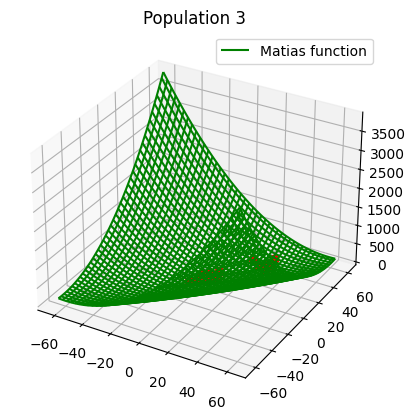


Population 4
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |         34         |        -47         |     1641.94      |
| 2  |         51         |        -30         |     1644.66      |
| 3  |         30         |        -51         |     1644.66      |
| 4  |         55         |        -26         |     1648.66      |
| 5  |         55         |        -26         |     1648.66      |
| 6  |         55         |        -26         |     1648.66      |
| 7  |         59         |        -22         |     1653.94      |
| 8  |         59         |        -22         |     1653.94      |
| 9  |         59         |        -22         |     1653.94      |
| 10 |         59         |        -22         |     1653.94      |
| 11 |         42         |        -40         |     1681.04      |
| 12 |         38         |        -44         |     1681.36      |
| 13 |         27         |        -56         |     1730.66      |
| 14 |         63         |       

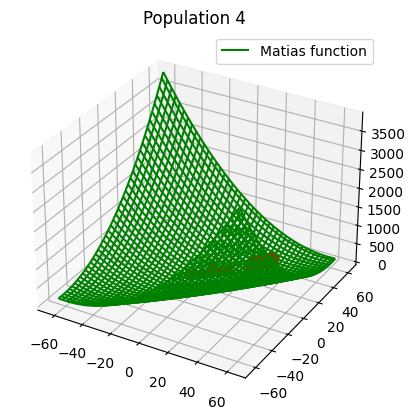


Population 5
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |         38         |        -44         |     1681.36      |
| 2  |         38         |        -44         |     1681.36      |
| 3  |         27         |        -56         |     1730.66      |
| 4  |         23         |        -60         |     1735.94      |
| 5  |         59         |        -26         |     1817.14      |
| 6  |         59         |        -26         |     1817.14      |
| 7  |         63         |        -22         |     1823.06      |
| 8  |         63         |        -22         |     1823.06      |
| 9  |         63         |        -22         |     1823.06      |
| 10 |         51         |        -38         |     1981.94      |
| 11 |         51         |        -38         |     1981.94      |
| 12 |         34         |        -55         |     1984.66      |
| 13 |         34         |        -55         |     1984.66      |
| 14 |         55         |       

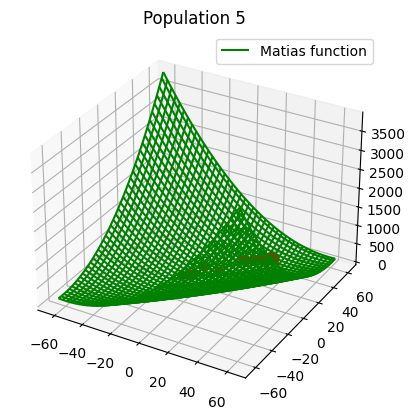


Population 6
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |         63         |        -22         |     1823.06      |
| 2  |         38         |        -51         |     1981.94      |
| 3  |         38         |        -51         |     1981.94      |
| 4  |         38         |        -51         |     1981.94      |
| 5  |         38         |        -51         |     1981.94      |
| 6  |         55         |        -34         |     1984.66      |
| 7  |         55         |        -34         |     1984.66      |
| 8  |         55         |        -34         |     1984.66      |
| 9  |         59         |        -30         |     1988.66      |
| 10 |         59         |        -30         |     1988.66      |
| 11 |         59         |        -30         |     1988.66      |
| 12 |         59         |        -30         |     1988.66      |
| 13 |         59         |        -30         |     1988.66      |
| 14 |         63         |       

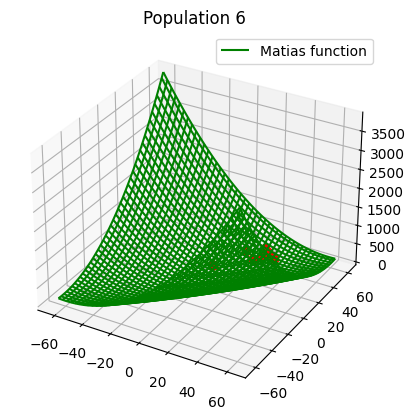


Population 7
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |         55         |        -34         |     1984.66      |
| 2  |         59         |        -30         |     1988.66      |
| 3  |         59         |        -30         |     1988.66      |
| 4  |         59         |        -30         |     1988.66      |
| 5  |         59         |        -30         |     1988.66      |
| 6  |         59         |        -30         |     1988.66      |
| 7  |         59         |        -30         |     1988.66      |
| 8  |         59         |        -30         |     1988.66      |
| 9  |         63         |        -26         |     1993.94      |
| 10 |         63         |        -26         |     1993.94      |
| 11 |         63         |        -26         |     1993.94      |
| 12 |         63         |        -26         |     1993.94      |
| 13 |         63         |        -26         |     1993.94      |
| 14 |         59         |       

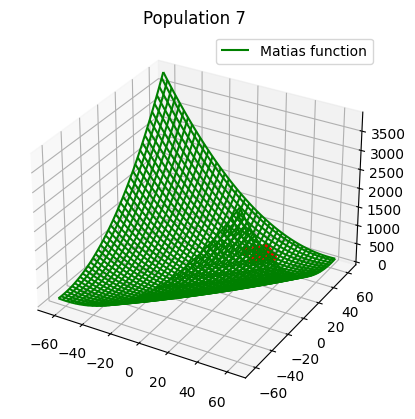


Population 8
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |         63         |        -26         |     1993.94      |
| 2  |         63         |        -26         |     1993.94      |
| 3  |         63         |        -26         |     1993.94      |
| 4  |         63         |        -26         |     1993.94      |
| 5  |         59         |        -34         |      2168.5      |
| 6  |         63         |        -30         |     2173.14      |
| 7  |         63         |        -30         |     2173.14      |
| 8  |         63         |        -30         |     2173.14      |
| 9  |         63         |        -30         |     2173.14      |
| 10 |         63         |        -30         |     2173.14      |
| 11 |         63         |        -30         |     2173.14      |
| 12 |         55         |        -42         |     2353.94      |
| 13 |         55         |        -42         |     2353.94      |
| 14 |         59         |       

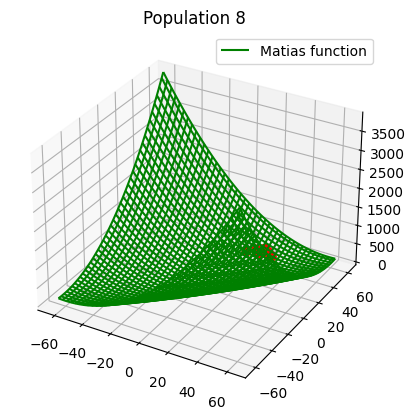


Population 9
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |         63         |        -30         |     2173.14      |
| 2  |         63         |        -30         |     2173.14      |
| 3  |         63         |        -30         |     2173.14      |
| 4  |         63         |        -30         |     2173.14      |
| 5  |         63         |        -30         |     2173.14      |
| 6  |         55         |        -42         |     2353.94      |
| 7  |         55         |        -42         |     2353.94      |
| 8  |         55         |        -42         |     2353.94      |
| 9  |         59         |        -38         |     2356.66      |
| 10 |         59         |        -38         |     2356.66      |
| 11 |         59         |        -38         |     2356.66      |
| 12 |         63         |        -34         |     2360.66      |
| 13 |         63         |        -34         |     2360.66      |
| 14 |         63         |       

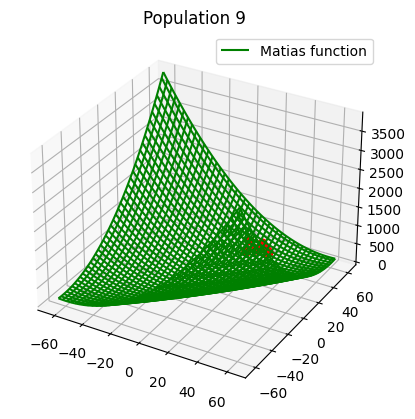


Population 10
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |         59         |        -38         |     2356.66      |
| 2  |         59         |        -38         |     2356.66      |
| 3  |         63         |        -34         |     2360.66      |
| 4  |         63         |        -34         |     2360.66      |
| 5  |         63         |        -34         |     2360.66      |
| 6  |         63         |        -34         |     2360.66      |
| 7  |         63         |        -34         |     2360.66      |
| 8  |         63         |        -34         |     2360.66      |
| 9  |         63         |        -34         |     2360.66      |
| 10 |         63         |        -34         |     2360.66      |
| 11 |         63         |        -34         |     2360.66      |
| 12 |         59         |        -42         |     2553.14      |
| 13 |         63         |        -38         |      2556.5      |
| 14 |         63         |      

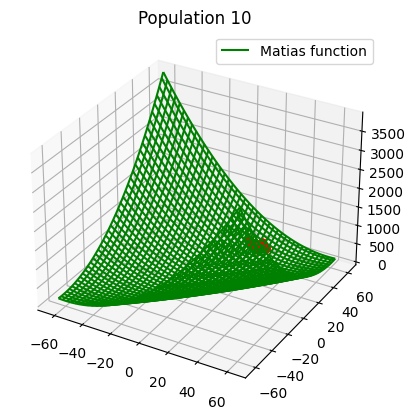


Difference in population fitness between first and final population: 1868.11
Difference in max fitness between first and final population: 764.0


In [26]:
method(functionMatias, graficMatias, total_iter, N, left_side, right_side, Pm, Mv, Sigma, in_phenotype)

### Optimize Mackormic Function


Population 1
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |        -31         |        -31         |      -29.26      |
| 2  |        -12         |         13         |      677.34      |
| 3  |        -53         |         2          |     3109.83      |
| 4  |        -51         |         61         |     12773.46     |
| 5  |         36         |         1          |     1173.86      |
| 6  |        -51         |         62         |     13000.5      |
| 7  |         32         |        -37         |     4622.46      |
| 8  |         37         |         52         |      301.36      |
| 9  |        -46         |        -27         |      364.18      |
| 10 |         31         |        -51         |     6550.09      |
| 11 |        -18         |         37         |     3145.65      |
| 12 |        -21         |        -43         |      408.08      |
| 13 |        -46         |         -2         |     2001.77      |
| 14 |        -50         |       

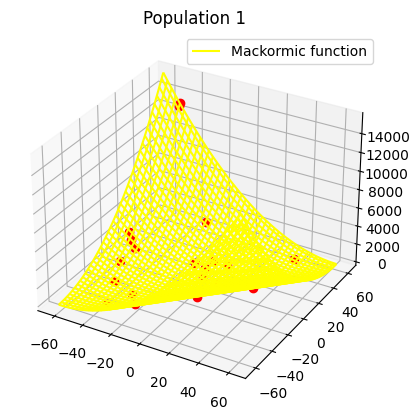


Population 2
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |        -57         |         6          |     4069.83      |
| 2  |         32         |        -37         |     4622.46      |
| 3  |         36         |        -33         |     4625.64      |
| 4  |         27         |        -55         |     6546.73      |
| 5  |         27         |        -55         |     6546.73      |
| 6  |         31         |        -51         |     6550.09      |
| 7  |         40         |        -42         |     6559.09      |
| 8  |         40         |        -42         |     6559.09      |
| 9  |         40         |        -42         |     6559.09      |
| 10 |         44         |        -46         |     7919.09      |
| 11 |        -47         |         57         |     11029.46     |
| 12 |        -47         |         57         |     11029.46     |
| 13 |        -47         |         58         |     11240.5      |
| 14 |        -47         |       

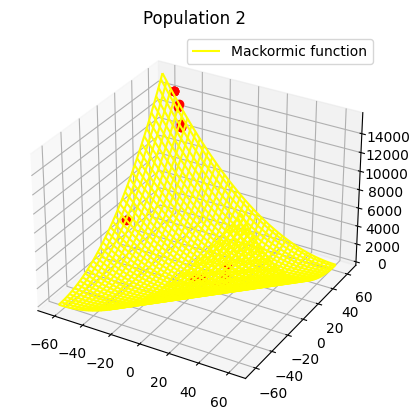


Population 3
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |        -51         |         54         |     11237.64     |
| 2  |        -47         |         58         |     11240.5      |
| 3  |        -47         |         58         |     11240.5      |
| 4  |        -43         |         62         |     11245.65     |
| 5  |        -51         |         59         |     12325.99     |
| 6  |        -51         |         59         |     12325.99     |
| 7  |        -47         |         63         |     12328.71     |
| 8  |        -47         |         63         |     12328.71     |
| 9  |        -51         |         61         |     12773.46     |
| 10 |        -51         |         61         |     12773.46     |
| 11 |        -51         |         62         |     13000.5      |
| 12 |        -51         |         63         |     13230.46     |
| 13 |        -51         |         63         |     13230.46     |
| 14 |        -51         |       

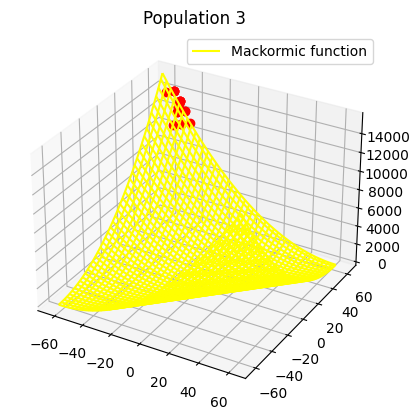


Population 4
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |        -51         |         61         |     12773.46     |
| 2  |        -55         |         58         |     12997.64     |
| 3  |        -51         |         62         |     13000.5      |
| 4  |        -51         |         62         |     13000.5      |
| 5  |        -51         |         63         |     13230.46     |
| 6  |        -51         |         63         |     13230.46     |
| 7  |        -51         |         63         |     13230.46     |
| 8  |        -51         |         63         |     13230.46     |
| 9  |        -59         |         59         |     14161.0      |
| 10 |        -59         |         59         |     14161.0      |
| 11 |        -59         |         59         |     14161.0      |
| 12 |        -55         |         63         |     14165.99     |
| 13 |        -55         |         63         |     14165.99     |
| 14 |        -55         |       

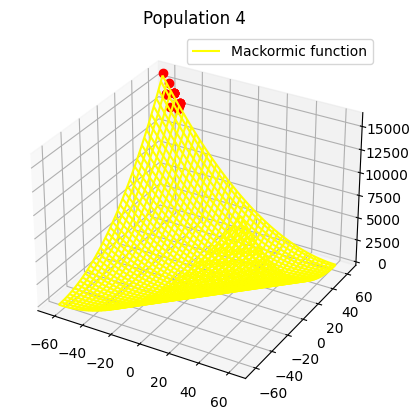


Population 5
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |        -59         |         59         |     14161.0      |
| 2  |        -59         |         59         |     14161.0      |
| 3  |        -59         |         59         |     14161.0      |
| 4  |        -55         |         63         |     14165.99     |
| 5  |        -55         |         63         |     14165.99     |
| 6  |        -55         |         63         |     14165.99     |
| 7  |        -55         |         63         |     14165.99     |
| 8  |        -55         |         63         |     14165.99     |
| 9  |        -55         |         63         |     14165.99     |
| 10 |        -55         |         63         |     14165.99     |
| 11 |        -55         |         63         |     14165.99     |
| 12 |        -55         |         63         |     14165.99     |
| 13 |        -55         |         63         |     14165.99     |
| 14 |        -55         |       

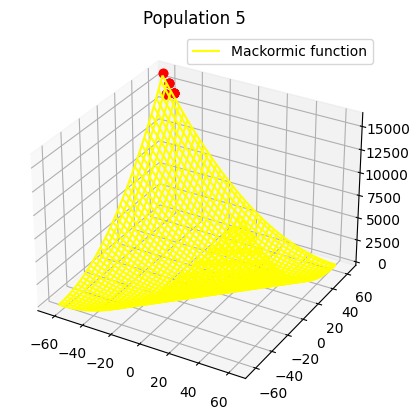


Population 6
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |        -55         |         63         |     14165.99     |
| 2  |        -55         |         63         |     14165.99     |
| 3  |        -55         |         63         |     14165.99     |
| 4  |        -55         |         63         |     14165.99     |
| 5  |        -55         |         63         |     14165.99     |
| 6  |        -55         |         63         |     14165.99     |
| 7  |        -63         |         59         |     15127.76     |
| 8  |        -59         |         63         |     15130.24     |
| 9  |        -59         |         63         |     15130.24     |
| 10 |        -59         |         63         |     15130.24     |
| 11 |        -59         |         63         |     15130.24     |
| 12 |        -59         |         63         |     15130.24     |
| 13 |        -59         |         63         |     15130.24     |
| 14 |        -59         |       

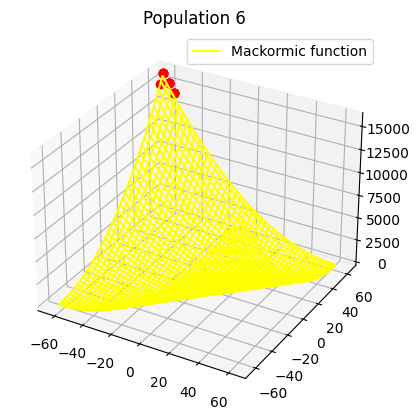


Population 7
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |        -63         |         59         |     15127.76     |
| 2  |        -63         |         59         |     15127.76     |
| 3  |        -63         |         59         |     15127.76     |
| 4  |        -63         |         59         |     15127.76     |
| 5  |        -59         |         63         |     15130.24     |
| 6  |        -59         |         63         |     15130.24     |
| 7  |        -59         |         63         |     15130.24     |
| 8  |        -59         |         63         |     15130.24     |
| 9  |        -59         |         63         |     15130.24     |
| 10 |        -59         |         63         |     15130.24     |
| 11 |        -59         |         63         |     15130.24     |
| 12 |        -59         |         63         |     15130.24     |
| 13 |        -59         |         63         |     15130.24     |
| 14 |        -59         |       

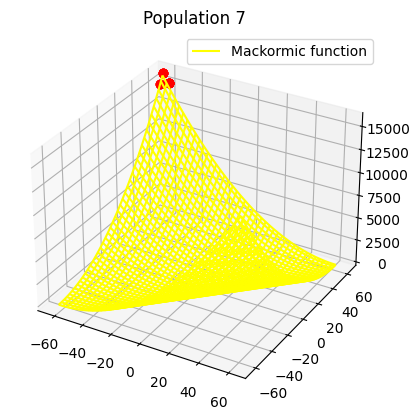


Population 8
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |        -59         |         63         |     15130.24     |
| 2  |        -59         |         63         |     15130.24     |
| 3  |        -59         |         63         |     15130.24     |
| 4  |        -59         |         63         |     15130.24     |
| 5  |        -59         |         63         |     15130.24     |
| 6  |        -59         |         63         |     15130.24     |
| 7  |        -59         |         63         |     15130.24     |
| 8  |        -59         |         63         |     15130.24     |
| 9  |        -63         |         63         |     16129.0      |
| 10 |        -63         |         63         |     16129.0      |
| 11 |        -63         |         63         |     16129.0      |
| 12 |        -63         |         63         |     16129.0      |
| 13 |        -63         |         63         |     16129.0      |
| 14 |        -63         |       

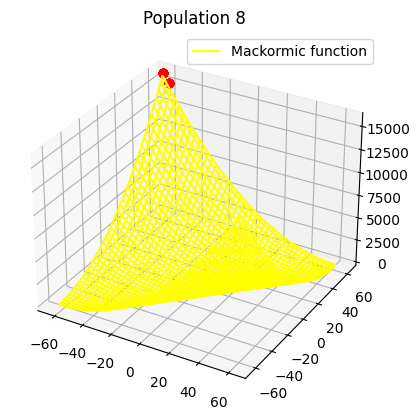


Population 9
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |        -59         |         63         |     15130.24     |
| 2  |        -63         |         63         |     16129.0      |
| 3  |        -63         |         63         |     16129.0      |
| 4  |        -63         |         63         |     16129.0      |
| 5  |        -63         |         63         |     16129.0      |
| 6  |        -63         |         63         |     16129.0      |
| 7  |        -63         |         63         |     16129.0      |
| 8  |        -63         |         63         |     16129.0      |
| 9  |        -63         |         63         |     16129.0      |
| 10 |        -63         |         63         |     16129.0      |
| 11 |        -63         |         63         |     16129.0      |
| 12 |        -63         |         63         |     16129.0      |
| 13 |        -63         |         63         |     16129.0      |
| 14 |        -63         |       

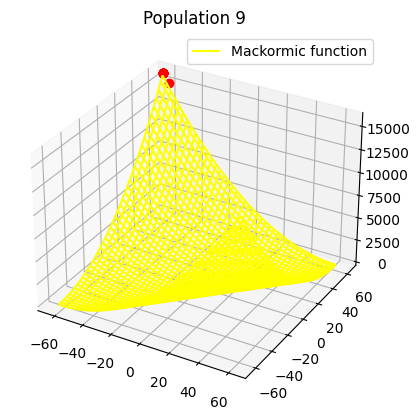


Population 10
| №  |    Phenotype(x)    |    Phenotype(y)    | Fitness function |
| 1  |        -63         |         63         |     16129.0      |
| 2  |        -63         |         63         |     16129.0      |
| 3  |        -63         |         63         |     16129.0      |
| 4  |        -63         |         63         |     16129.0      |
| 5  |        -63         |         63         |     16129.0      |
| 6  |        -63         |         63         |     16129.0      |
| 7  |        -63         |         63         |     16129.0      |
| 8  |        -63         |         63         |     16129.0      |
| 9  |        -63         |         63         |     16129.0      |
| 10 |        -63         |         63         |     16129.0      |
| 11 |        -63         |         63         |     16129.0      |
| 12 |        -63         |         63         |     16129.0      |
| 13 |        -63         |         63         |     16129.0      |
| 14 |        -63         |      

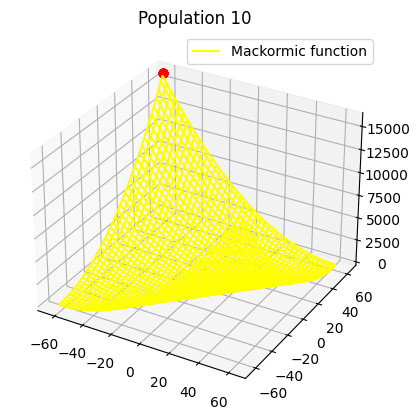


Difference in population fitness between first and final population: 13012.15
Difference in max fitness between first and final population: 3128.5


In [35]:
method(functionMackormic, graficMackormic, total_iter, N, left_side, right_side, Pm, Mv, Sigma, in_phenotype)